In [1]:
import zipfile
import os

# Manually enter the path here, using raw string (prefix with 'r') or replace \ with /
zip_path = r"C:\Users\rishi\Downloads\archive (3).zip"
extract_path = r"C:\Users\rishi\Downloads\dataset"  # Change if you want a different folder

# Create the extraction folder if it doesn't exist
os.makedirs(extract_path, exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List the extracted contents
print("Extracted files:", os.listdir(extract_path))


Extracted files: ['IRIS and FINGERPRINT DATASET']


In [2]:
import os

# Define the main dataset folder (adjust the path as needed)
dataset_folder = r"C:\Users\rishi\Downloads\dataset\IRIS and FINGERPRINT DATASET"

# List the main contents
print("Dataset Folders:", os.listdir(dataset_folder))

# Check a sample subject folder
sample_subject = os.path.join(dataset_folder, "1")
print("Contents of Subject 1:", os.listdir(sample_subject))


Dataset Folders: ['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '5', '6', '7', '8', '9', 'desktop.ini']
Contents of Subject 1: ['desktop.ini', 'Fingerprint', 'left', 'right']


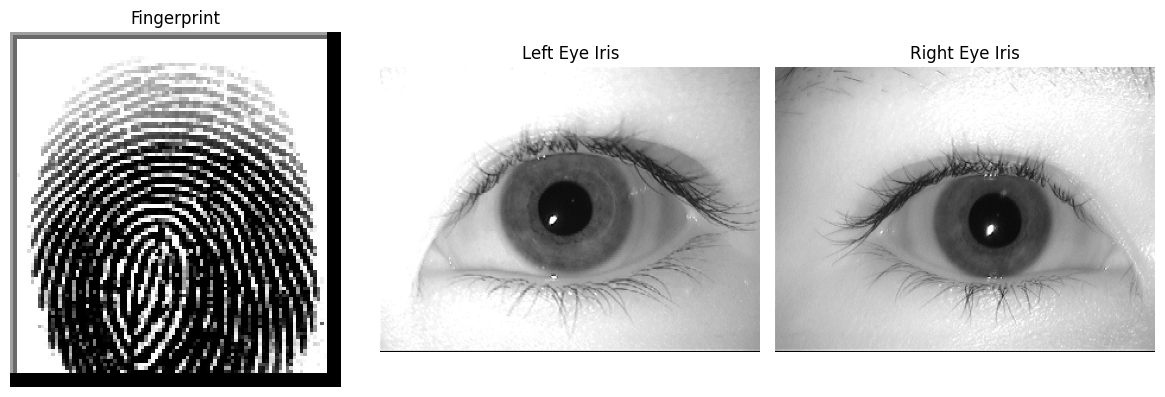

In [3]:
import cv2
import matplotlib.pyplot as plt
import os

# Define dataset path
dataset_folder = r"C:\Users\rishi\Downloads\dataset\IRIS and FINGERPRINT DATASET"

# Define paths to a sample fingerprint and iris image
sample_fingerprint_path = os.path.join(dataset_folder, "1", "Fingerprint")
sample_left_eye_path = os.path.join(dataset_folder, "1", "left")
sample_right_eye_path = os.path.join(dataset_folder, "1", "right")

# Get a sample file from each folder
fingerprint_file = os.listdir(sample_fingerprint_path)[0]
left_eye_file = os.listdir(sample_left_eye_path)[0]
right_eye_file = os.listdir(sample_right_eye_path)[0]

# Load images in grayscale
fingerprint_img = cv2.imread(os.path.join(sample_fingerprint_path, fingerprint_file), cv2.IMREAD_GRAYSCALE)
left_eye_img = cv2.imread(os.path.join(sample_left_eye_path, left_eye_file), cv2.IMREAD_GRAYSCALE)
right_eye_img = cv2.imread(os.path.join(sample_right_eye_path, right_eye_file), cv2.IMREAD_GRAYSCALE)

# Display images using matplotlib
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(fingerprint_img, cmap="gray")
axes[0].set_title("Fingerprint")

axes[1].imshow(left_eye_img, cmap="gray")
axes[1].set_title("Left Eye Iris")

axes[2].imshow(right_eye_img, cmap="gray")
axes[2].set_title("Right Eye Iris")

for ax in axes:
    ax.axis("off")

plt.tight_layout()
plt.show()


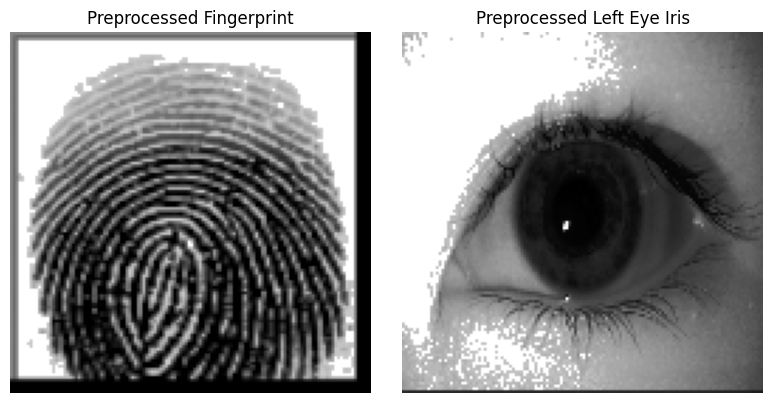

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Define target image size
IMG_SIZE = (128, 128)

def preprocess_image(image_path):
    """
    Loads an image, converts to grayscale, resizes, applies histogram equalization, and normalizes.
    """
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Image at {image_path} could not be loaded.")
    
    img = cv2.resize(img, IMG_SIZE)
    img = cv2.equalizeHist(img)
    img = img / 255.0  # Normalize to [0, 1]
    return img

# Preprocess a fingerprint and an iris image
fingerprint_processed = preprocess_image(os.path.join(sample_fingerprint_path, fingerprint_file))
left_eye_processed = preprocess_image(os.path.join(sample_left_eye_path, left_eye_file))

# Display the preprocessed images
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].imshow(fingerprint_processed, cmap="gray")
axes[0].set_title("Preprocessed Fingerprint")

axes[1].imshow(left_eye_processed, cmap="gray")
axes[1].set_title("Preprocessed Left Eye Iris")

for ax in axes:
    ax.axis("off")

plt.tight_layout()
plt.show()


In [5]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Initialize lists for data and labels
fingerprint_data, iris_data, labels = [], [], []

# Get subject folders (e.g., 1 to 45)
subject_folders = sorted([f for f in os.listdir(dataset_folder) if f.isdigit()])

# Load images from each subject
for subject_id, subject in enumerate(subject_folders):
    subject_path = os.path.join(dataset_folder, subject)

    # Load fingerprint images (handling BMP/bmp extensions)
    fingerprint_images = glob.glob(os.path.join(subject_path, "Fingerprint", "*.[bB][mM][pP]"))

    for img_path in fingerprint_images:
        try:
            fingerprint_data.append(preprocess_image(img_path))
            labels.append(subject_id)  # Label corresponds to subject
        except Exception as e:
            print(f"Error loading fingerprint: {img_path} – {e}")

    # Load left and right iris images
    left_eye_images = glob.glob(os.path.join(subject_path, "left", "*.bmp"))
    right_eye_images = glob.glob(os.path.join(subject_path, "right", "*.bmp"))

    for img_path in left_eye_images + right_eye_images:
        try:
            iris_data.append(preprocess_image(img_path))
            labels.append(subject_id)
        except Exception as e:
            print(f"Error loading iris: {img_path} – {e}")

# Convert lists to NumPy arrays
if fingerprint_data:
    fingerprint_data = np.array(fingerprint_data).reshape(-1, 128, 128, 1)
else:
    print("No fingerprint images found!")

if iris_data:
    iris_data = np.array(iris_data).reshape(-1, 128, 128, 1)
else:
    print("No iris images found!")

labels = np.array(labels)

# Split into training and testing sets (80% train, 20% test)
if len(fingerprint_data) > 0:
    fingerprint_train, fingerprint_test, labels_train, labels_test = train_test_split(
        fingerprint_data, labels[:len(fingerprint_data)], test_size=0.2, random_state=42, stratify=labels[:len(fingerprint_data)]
    )

if len(iris_data) > 0:
    iris_train, iris_test, _, _ = train_test_split(
        iris_data, labels[:len(iris_data)], test_size=0.2, random_state=42, stratify=labels[:len(iris_data)]
    )

# Print dataset sizes
if len(fingerprint_data) > 0:
    print(f"Fingerprint Train: {fingerprint_train.shape}, Test: {fingerprint_test.shape}")
if len(iris_data) > 0:
    print(f"Iris Train: {iris_train.shape}, Test: {iris_test.shape}")
print(f"Labels Total: {labels.shape}")


Fingerprint Train: (360, 128, 128, 1), Test: (90, 128, 128, 1)
Iris Train: (360, 128, 128, 1), Test: (90, 128, 128, 1)
Labels Total: (900,)


In [6]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, concatenate
from tensorflow.keras.models import Model


In [7]:
def build_cnn_branch(input_shape):
    """
    Builds a CNN branch for either fingerprint or iris input.
    
    Parameters:
        input_shape (tuple): Shape of the input image, e.g., (128, 128, 1)
    
    Returns:
        input_layer: Keras Input layer
        x: Output tensor of the CNN branch
    """
    input_layer = Input(shape=input_shape)

    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
    x = MaxPooling2D((2, 2))(x)

    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)

    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)

    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)

    return input_layer, x


In [8]:
# Define input shape for both modalities
input_shape = (128, 128, 1)  # Grayscale images

# Build fingerprint CNN branch
fingerprint_input, fingerprint_features = build_cnn_branch(input_shape)

# Build iris CNN branch
iris_input, iris_features = build_cnn_branch(input_shape)

# Concatenate features from both branches
merged_features = concatenate([fingerprint_features, iris_features])

# Fully connected classification head
x = Dense(256, activation='relu')(merged_features)
x = Dropout(0.5)(x)
output_layer = Dense(len(set(labels)), activation='softmax')(x)  # Number of unique classes/subjects

# Define and compile the final model
model = Model(inputs=[fingerprint_input, iris_input], outputs=output_layer)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display model architecture
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 128, 128, 1)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_layer_1 (InputLayer)    │ (None, 128, 128, 1)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 128, 128, 32)      │             320 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 128, 128, 32)      │             320 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 64, 64, 32)        │               0 │ conv2d[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_3               │ (None, 64, 64, 32)        │               0 │ conv2d_3[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 64, 64, 64)        │          18,496 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 64, 64, 64)        │          18,496 │ max_pooling2d_3[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_1               │ (None, 32, 32, 64)        │               0 │ conv2d_1[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_4               │ (None, 32, 32, 64)        │               0 │ conv2d_4[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 32, 32, 128)       │          73,856 │ max_pooling2d_1[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_5 (Conv2D)             │ (None, 32, 32, 128)       │          73,856 │ max_pooling2d_4[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_2               │ (None, 16, 16, 128)       │               0 │ conv2d_2[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_5               │ (None, 16, 16, 128)       │               0 │ conv2d_5[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten (Flatten)             │ (None, 32768)             │               

 Total params: 8,651,565 (33.00 MB)

 Trainable params: 8,651,565 (33.00 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
print("Fingerprint Data Shape:", fingerprint_data.shape)
print("Iris Data Shape:", iris_data.shape)
print("Labels Shape:", labels.shape)


Fingerprint Data Shape: (450, 128, 128, 1)
Iris Data Shape: (450, 128, 128, 1)
Labels Shape: (900,)


In [10]:
labels = labels[:450]  # Trim labels to match dataset size


In [11]:
from sklearn.model_selection import train_test_split

# Split fingerprint data
X_train_fingerprint, X_test_fingerprint, y_train, y_test = train_test_split(
    fingerprint_data, labels, test_size=0.2, random_state=42, stratify=labels
)

# Split iris data (we don't need the labels again here)
X_train_iris, X_test_iris, _, _ = train_test_split(
    iris_data, labels, test_size=0.2, random_state=42, stratify=labels
)


In [12]:
print("Fingerprint Train Shape:", X_train_fingerprint.shape)
print("Iris Train Shape:", X_train_iris.shape)
print("Labels Train Shape:", y_train.shape)

print("Fingerprint Test Shape:", X_test_fingerprint.shape)
print("Iris Test Shape:", X_test_iris.shape)
print("Labels Test Shape:", y_test.shape)


Fingerprint Train Shape: (360, 128, 128, 1)
Iris Train Shape: (360, 128, 128, 1)
Labels Train Shape: (360,)
Fingerprint Test Shape: (90, 128, 128, 1)
Iris Test Shape: (90, 128, 128, 1)
Labels Test Shape: (90,)


In [13]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

# Model training
history = model.fit(
    [X_train_fingerprint, X_train_iris], y_train,
    validation_data=([X_test_fingerprint, X_test_iris], y_test),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop, reduce_lr]
)


Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 237ms/step - accuracy: 0.0248 - loss: 3.8083 - val_accuracy: 0.0444 - val_loss: 3.4920 - learning_rate: 0.0010
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 216ms/step - accuracy: 0.0341 - loss: 3.5598 - val_accuracy: 0.0333 - val_loss: 3.3805 - learning_rate: 0.0010
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 216ms/step - accuracy: 0.0565 - loss: 3.4075 - val_accuracy: 0.0444 - val_loss: 3.2668 - learning_rate: 0.0010
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 216ms/step - accuracy: 0.0496 - loss: 3.3308 - val_accuracy: 0.0778 - val_loss: 3.3106 - learning_rate: 0.0010
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 214ms/step - accuracy: 0.0856 - loss: 3.3005 - val_accuracy: 0.0444 - val_loss: 3.1961 - learning_rate: 0.0010
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 218ms/step - accuracy: 0.0553 - loss: 3.2667 - val_accuracy: 0.0444 - val_loss: 3.1416 - learning_rate: 0.0010
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 219ms/step - accuracy: 0.1087 - loss: 3.1424 - 

In [14]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate([X_test_fingerprint, X_test_iris], y_test)

# Print results
print(f"Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")
# Or with percentage:
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5985 - loss: 1.6845
Test Accuracy: 0.6111, Test Loss: 1.7148
Test Accuracy: 61.11%


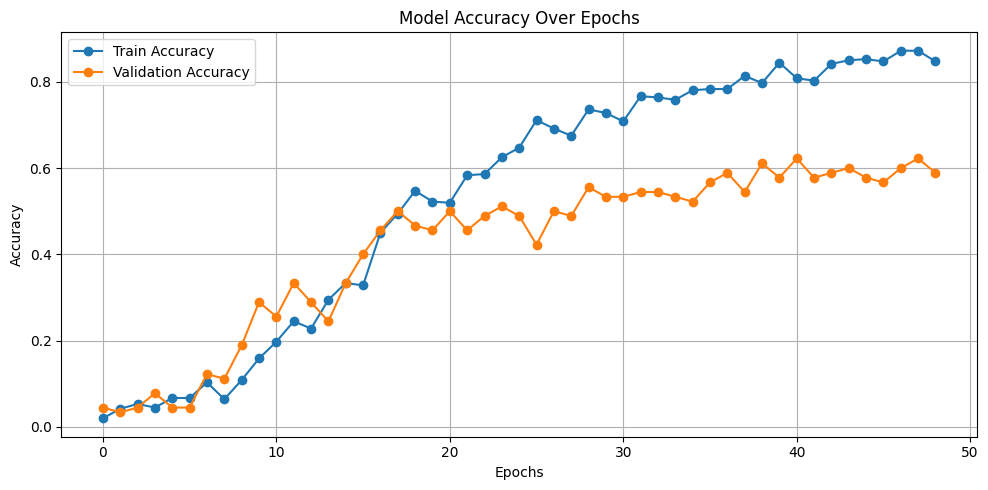

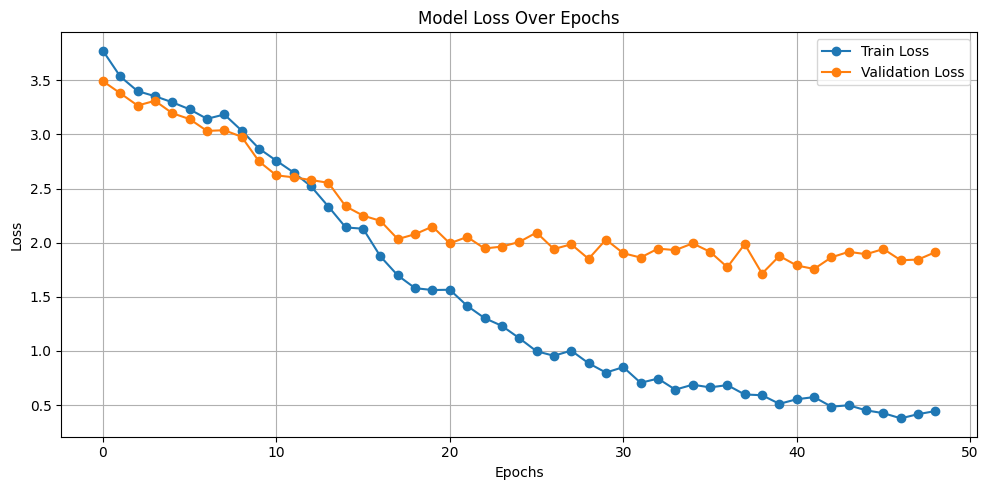

In [15]:
import matplotlib.pyplot as plt

# Accuracy Plot
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Loss Plot
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [16]:
import numpy as np

# Get model predictions
predictions = model.predict([X_test_fingerprint[:5], X_test_iris[:5]])
predicted_labels = np.argmax(predictions, axis=1)
confidences = np.max(predictions, axis=1)

# Display results
for i in range(5):
    print(f"Sample {i+1}: Predicted = {predicted_labels[i]} (Confidence: {confidences[i]:.2f}), Actual = {y_test[i]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Sample 1: Predicted = 20 (Confidence: 0.27), Actual = 13
Sample 2: Predicted = 9 (Confidence: 0.99), Actual = 9
Sample 3: Predicted = 16 (Confidence: 0.72), Actual = 10
Sample 4: Predicted = 14 (Confidence: 0.31), Actual = 14
Sample 5: Predicted = 8 (Confidence: 0.55), Actual = 8


In [17]:
[layer.name for layer in model.layers if 'conv' in layer.name]


['conv2d', 'conv2d_3', 'conv2d_1', 'conv2d_4', 'conv2d_2', 'conv2d_5']

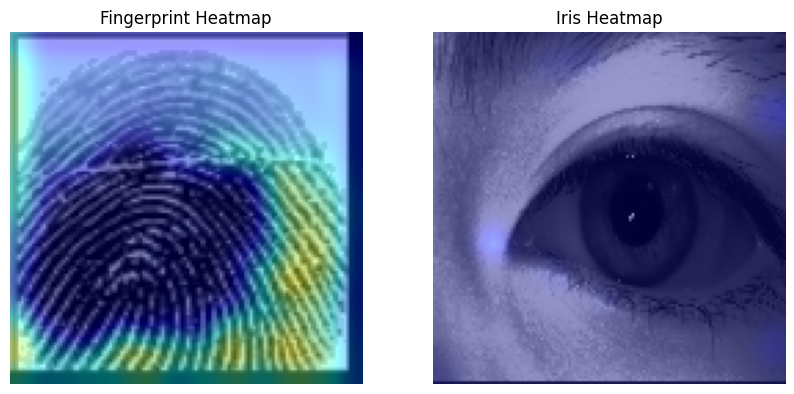

In [20]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

# Function to compute Grad-CAM heatmaps
def compute_gradcam(model, img, layer_name):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model([img[0], img[1]])
        loss = predictions[:, np.argmax(predictions)]

    grads = tape.gradient(loss, conv_outputs)[0]
    weights = tf.reduce_mean(grads, axis=(0, 1))

    cam = np.dot(conv_outputs[0], weights)
    cam = np.maximum(cam, 0)  # ReLU activation

    # Normalize heatmap
    cam -= np.min(cam)
    cam /= (np.max(cam) + 1e-10)
    cam = np.uint8(255 * cam)

    # Apply Gaussian Blur for smoothing
    cam = cv2.GaussianBlur(cam, (5, 5), 0)
    cam = cv2.resize(cam, (128, 128))  # Resize to match input image size

    return cam

# Function to overlay heatmap on image
def overlay_heatmap(img, cam):
    heatmap = cv2.applyColorMap(cam, cv2.COLORMAP_JET)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)
    overlayed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
    return overlayed_img

# Select a test image
test_fingerprint = X_test_fingerprint[0]
test_iris = X_test_iris[0]

# Convert grayscale images to RGB for overlaying
test_fingerprint_rgb = cv2.cvtColor(np.uint8(test_fingerprint * 255), cv2.COLOR_GRAY2RGB)
test_iris_rgb = cv2.cvtColor(np.uint8(test_iris * 255), cv2.COLOR_GRAY2RGB)

# Ensure both test inputs have batch dimensions
test_fingerprint_exp = np.expand_dims(test_fingerprint, axis=0)
test_iris_exp = np.expand_dims(test_iris, axis=0)

# Compute Grad-CAM for fingerprint and iris
cam_fingerprint = compute_gradcam(model, [test_fingerprint_exp, test_iris_exp], 'conv2d_2')
cam_iris = compute_gradcam(model, [test_fingerprint_exp, test_iris_exp], 'conv2d_5')

# Overlay heatmaps on original images
overlay_fingerprint = overlay_heatmap(test_fingerprint_rgb, cam_fingerprint)
overlay_iris = overlay_heatmap(test_iris_rgb, cam_iris)

# Display images
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(overlay_fingerprint)
ax[0].set_title("Fingerprint Heatmap")
ax[0].axis("off")

ax[1].imshow(overlay_iris)
ax[1].set_title("Iris Heatmap")
ax[1].axis("off")

plt.show()


In [34]:
def overlay_heatmap_on_image(original, heatmap, alpha=0.5, cmap='jet'):
    # Ensure original is RGB
    if len(original.shape) == 2:
        original = cv2.cvtColor(np.uint8(original * 255), cv2.COLOR_GRAY2RGB)
    elif original.max() <= 1.0:
        original = np.uint8(original * 255)

    # Resize heatmap to match original image
    heatmap_resized = cv2.resize(heatmap, (original.shape[1], original.shape[0]))

    # Apply colormap
    heatmap_color = cv2.applyColorMap(heatmap_resized, cv2.COLORMAP_JET)
    heatmap_color = cv2.cvtColor(heatmap_color, cv2.COLOR_BGR2RGB)

    # Overlay
    overlay = cv2.addWeighted(original, alpha, heatmap_color, 1 - alpha, 0)
    return overlay


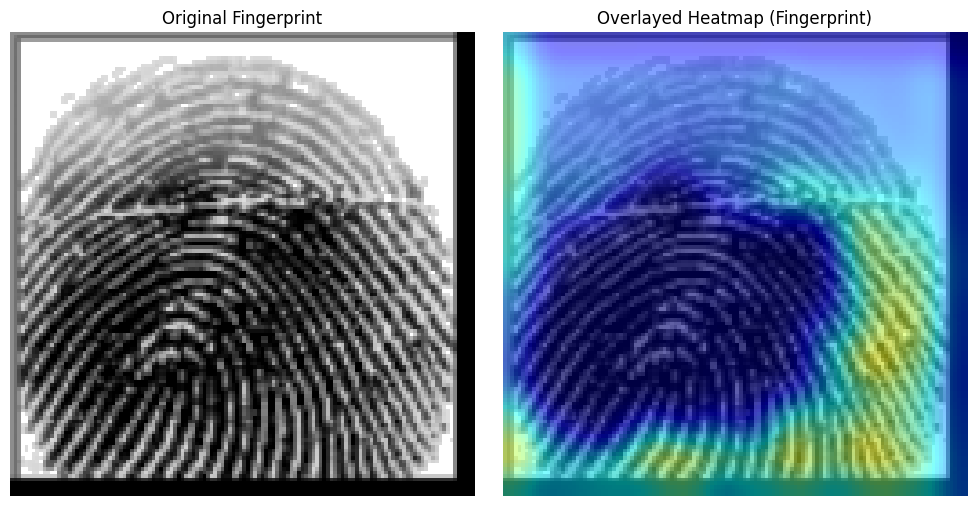

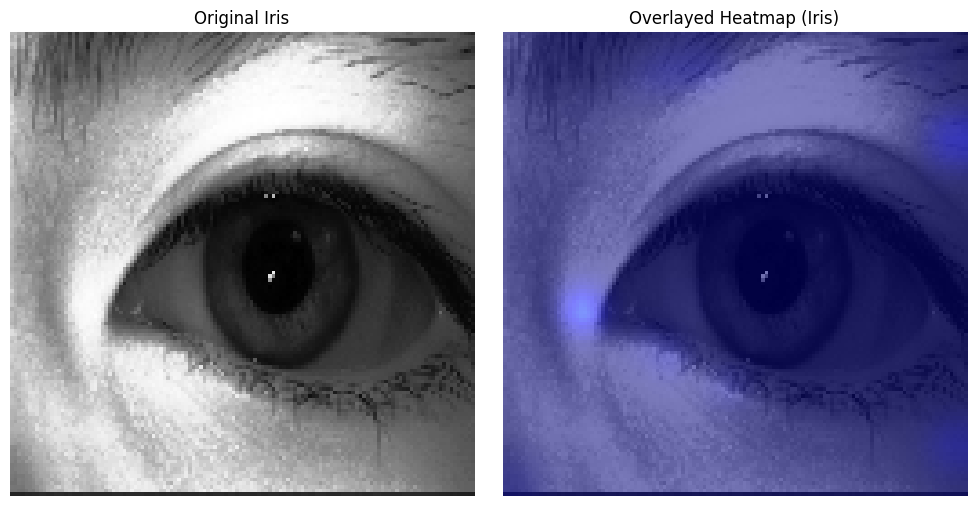

In [35]:
# Generate overlayed images
fingerprint_overlay = overlay_heatmap_on_image(test_fingerprint, cam_fingerprint)
iris_overlay = overlay_heatmap_on_image(test_iris, cam_iris)

# Display results
plot_side_by_side(test_fingerprint, fingerprint_overlay, "Original Fingerprint", "Overlayed Heatmap (Fingerprint)")
plot_side_by_side(test_iris, iris_overlay, "Original Iris", "Overlayed Heatmap (Iris)")


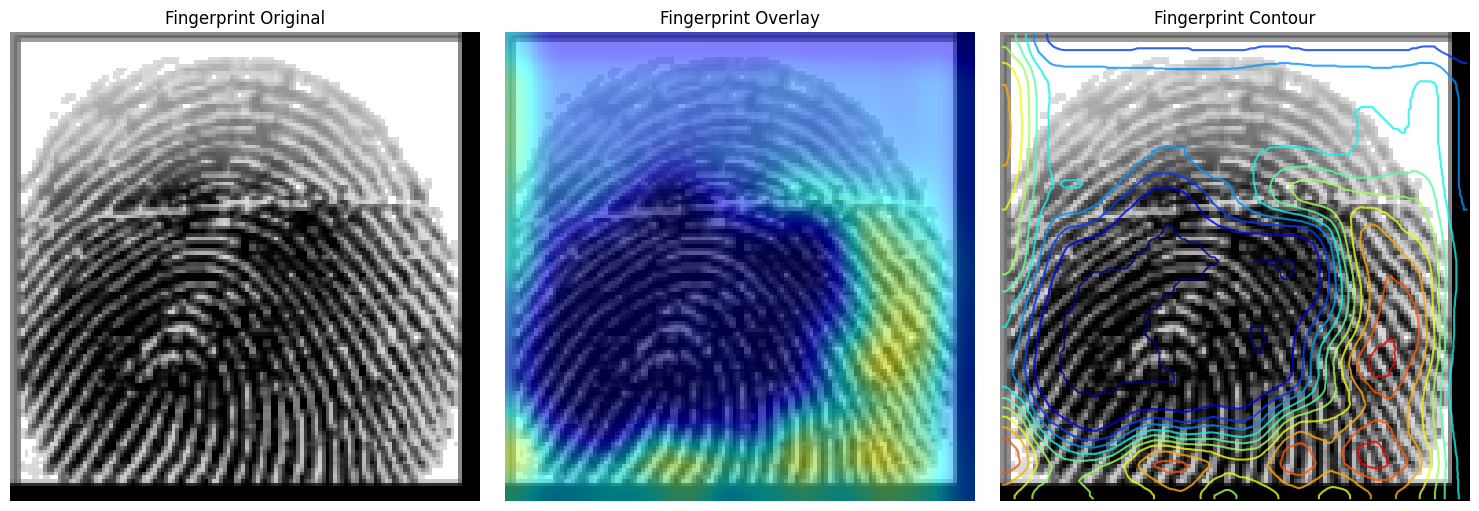

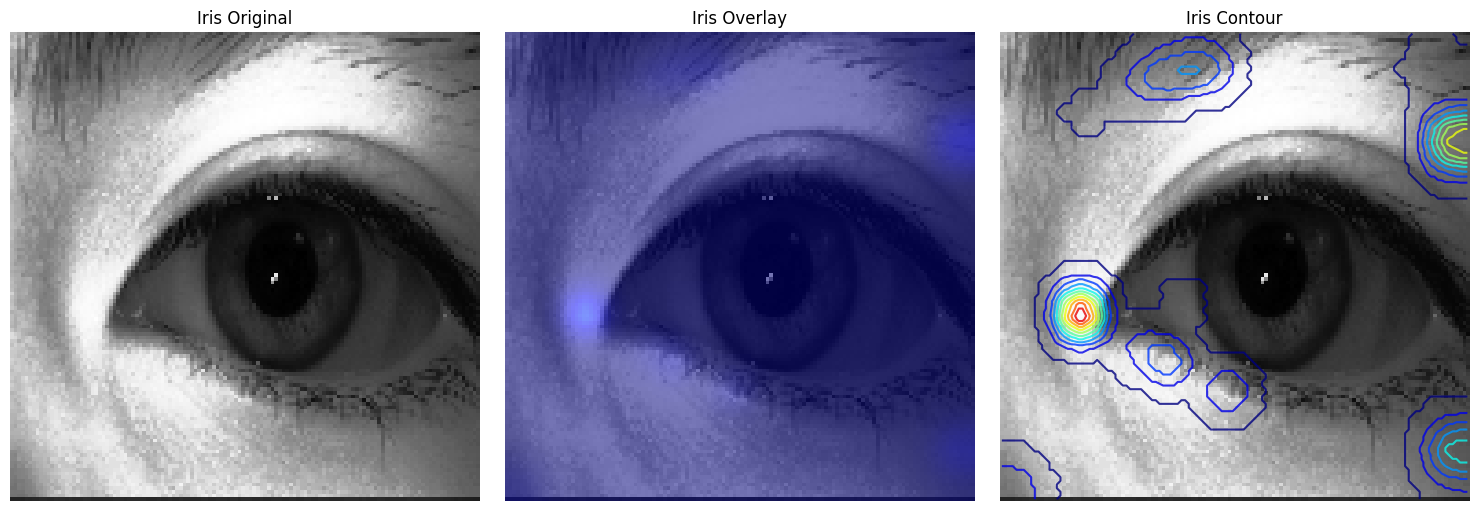

In [36]:
def plot_full_comparison(original, cam, title_prefix=""):
    overlay = overlay_heatmap_on_image(original, cam)
    
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(original, cmap="gray")
    ax[0].set_title(f"{title_prefix}Original")
    ax[0].axis("off")

    ax[1].imshow(overlay)
    ax[1].set_title(f"{title_prefix}Overlay")
    ax[1].axis("off")

    ax[2].imshow(original, cmap="gray")
    ax[2].contour(cam, levels=10, cmap="jet", alpha=0.8)
    ax[2].set_title(f"{title_prefix}Contour")
    ax[2].axis("off")

    plt.tight_layout()
    plt.show()

plot_full_comparison(test_fingerprint, cam_fingerprint, "Fingerprint ")
plot_full_comparison(test_iris, cam_iris, "Iris ")


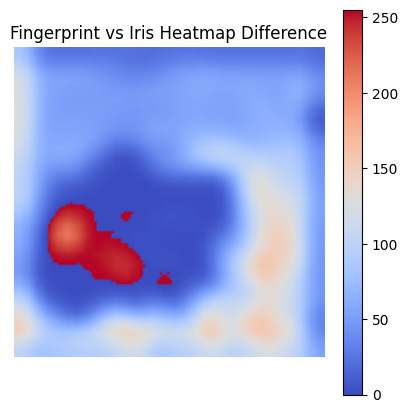

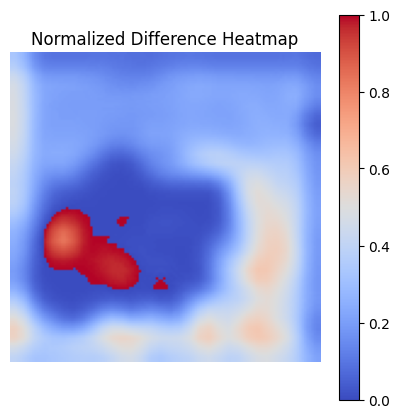

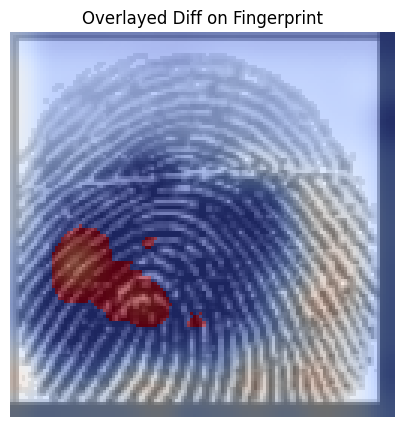

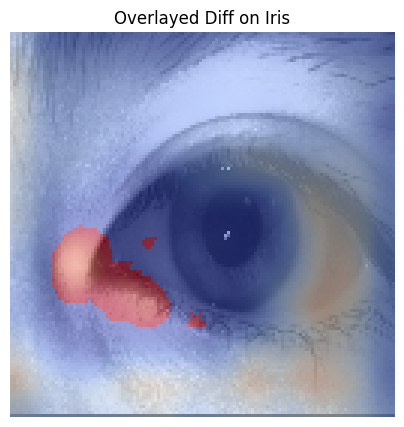

In [40]:
import numpy as np
import matplotlib.pyplot as plt

def plot_diff_heatmap(cam1, cam2, title="Difference Heatmap"):
    diff = np.abs(cam1 - cam2)  # Absolute difference between CAMs

    plt.figure(figsize=(5, 5))
    plt.imshow(diff, cmap="coolwarm")
    plt.colorbar()
    plt.title(title)
    plt.axis("off")
    plt.show()

    return diff

def plot_normalized_diff(diff, title="Normalized Difference Heatmap"):
    norm_diff = (diff - np.min(diff)) / (np.max(diff) - np.min(diff))

    plt.figure(figsize=(5, 5))
    plt.imshow(norm_diff, cmap="coolwarm")
    plt.colorbar()
    plt.title(title)
    plt.axis("off")
    plt.show()

    return norm_diff

def overlay_diff_on_image(image, diff, title="Overlayed Difference"):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.imshow(image, cmap="gray")
    ax.imshow(diff, cmap="coolwarm", alpha=0.5)
    ax.set_title(title)
    ax.axis("off")
    plt.show()

# Example usage:
# Assuming you already have cam_fingerprint, cam_iris, test_fingerprint, and test_iris

# Step 1: Plot raw difference heatmap
diff = plot_diff_heatmap(cam_fingerprint, cam_iris, "Fingerprint vs Iris Heatmap Difference")

# Step 2: (Optional) Plot normalized difference heatmap
norm_diff = plot_normalized_diff(diff, "Normalized Difference Heatmap")

# Step 3: (Optional) Overlay normalized difference on fingerprint image
overlay_diff_on_image(test_fingerprint, norm_diff, "Overlayed Diff on Fingerprint")

# Step 4: (Optional) Overlay normalized difference on iris image
overlay_diff_on_image(test_iris, norm_diff, "Overlayed Diff on Iris")


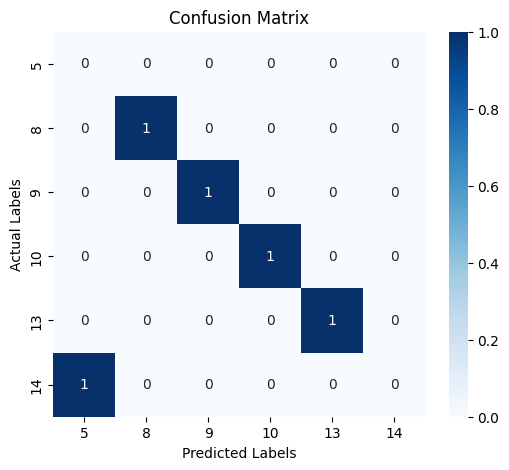

Classification Report:

              precision    recall  f1-score   support

           5       0.00      0.00      0.00         0
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.67      0.67      0.67         5
weighted avg       0.80      0.80      0.80         5



In [42]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Actual and predicted labels
y_true = np.array([13, 9, 10, 14, 8])
y_pred = np.array([13, 9, 10, 5, 8])

# Get sorted unique labels from both y_true and y_pred
labels = sorted(set(np.concatenate([y_true, y_pred])))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred, labels=labels)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, labels=labels, zero_division=0))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
🎯 Actual Label: 0

🔍 Top 5 Predictions with Confidence:
1. Class 0 - Confidence: 0.9308
2. Class 6 - Confidence: 0.0389
3. Class 21 - Confidence: 0.0088
4. Class 3 - Confidence: 0.0082
5. Class 12 - Confidence: 0.0030


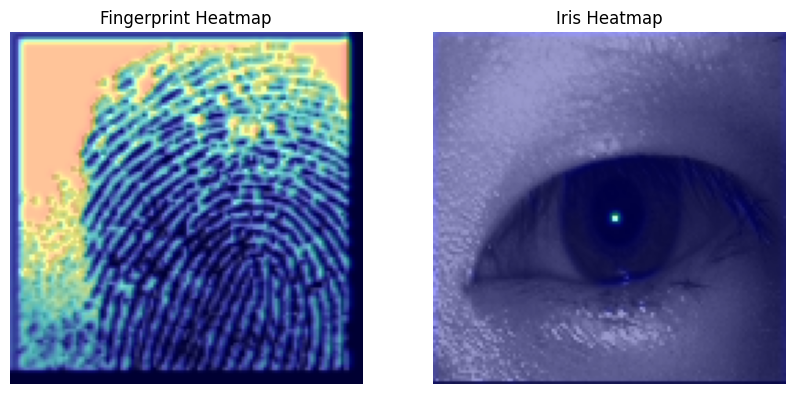

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf

# --- Grad-CAM Function ---
def compute_gradcam(model, img, layer_name):
    grad_model = tf.keras.models.Model([model.inputs], [model.get_layer(layer_name).output, model.output])
    
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img)
        loss = predictions[:, np.argmax(predictions)]

    grads = tape.gradient(loss, conv_outputs)[0]
    weights = tf.reduce_mean(grads, axis=(0, 1))
    cam = np.dot(conv_outputs[0], weights)

    cam = np.maximum(cam, 0)
    cam -= np.min(cam)
    cam /= (np.max(cam) + 1e-10)
    cam = np.uint8(255 * cam)
    cam = cv2.GaussianBlur(cam, (5, 5), 0)
    cam = cv2.resize(cam, (128, 128))
    return cam

# --- Overlay Function ---
def overlay_heatmap(img, cam):
    heatmap = cv2.applyColorMap(cam, cv2.COLORMAP_JET)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)
    overlayed = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
    return overlayed

# --- Prediction & Grad-CAM Demo ---
def demo_with_xai(index):
    # Select sample
    fingerprint = X_test_fingerprint[index]
    iris = X_test_iris[index]
    actual_label = y_test[index]

    # Prepare inputs
    fp_exp = np.expand_dims(fingerprint, axis=0)
    iris_exp = np.expand_dims(iris, axis=0)

    # Predict
    predictions = model.predict([fp_exp, iris_exp])[0]
    top5_idx = np.argsort(predictions)[::-1][:5]
    top5_probs = predictions[top5_idx]

    # Print predictions
    print(f"🎯 Actual Label: {actual_label}\n")
    print("🔍 Top 5 Predictions with Confidence:")
    for i, idx in enumerate(top5_idx):
        print(f"{i+1}. Class {idx} - Confidence: {top5_probs[i]:.4f}")

    # Compute Grad-CAM
    cam_fp = compute_gradcam(model, [fp_exp, iris_exp], 'conv2d')
    cam_iris = compute_gradcam(model, [fp_exp, iris_exp], 'conv2d_3')

    # Convert to RGB
    fingerprint_rgb = cv2.cvtColor(np.uint8(fingerprint * 255), cv2.COLOR_GRAY2RGB)
    iris_rgb = cv2.cvtColor(np.uint8(iris * 255), cv2.COLOR_GRAY2RGB)

    # Overlays
    overlay_fp = overlay_heatmap(fingerprint_rgb, cam_fp)
    overlay_iris = overlay_heatmap(iris_rgb, cam_iris)

    # Plot heatmaps
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(overlay_fp)
    ax[0].set_title("Fingerprint Heatmap")
    ax[0].axis("off")

    ax[1].imshow(overlay_iris)
    ax[1].set_title("Iris Heatmap")
    ax[1].axis("off")
    plt.show()

# Run the demo for 1 sample (change index to test others)
import random
random_index = random.randint(0, len(X_test_fingerprint) - 1)
demo_with_xai(index=random_index)

